In [57]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/leaf-classification1/images/1269.jpg
/kaggle/input/leaf-classification1/images/623.jpg
/kaggle/input/leaf-classification1/images/764.jpg
/kaggle/input/leaf-classification1/images/1075.jpg
/kaggle/input/leaf-classification1/images/771.jpg
/kaggle/input/leaf-classification1/images/208.jpg
/kaggle/input/leaf-classification1/images/820.jpg
/kaggle/input/leaf-classification1/images/473.jpg
/kaggle/input/leaf-classification1/images/1411.jpg
/kaggle/input/leaf-classification1/images/1031.jpg
/kaggle/input/leaf-classification1/images/1501.jpg
/kaggle/input/leaf-classification1/images/1385.jpg
/kaggle/input/leaf-classification1/images/1383.jpg
/kaggle/input/leaf-classification1/images/333.jpg
/kaggle/input/leaf-classification1/images/1354.jpg
/kaggle/input/leaf-classification1/images/1024.jpg
/kaggle/input/leaf-classification1/images/537.jpg
/kaggle/input/leaf-classification1/images/45.jpg
/kaggle/input/leaf-classification1/images/369.jpg
/kaggle/input/leaf-classification1/images/

In [58]:
import numpy as np                    
import matplotlib.image as mpimg       
import matplotlib.pyplot as plt       
import matplotlib.patches as mpatches 
from skimage import measure            
import scipy.ndimage as ndi           
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = (6, 6)     

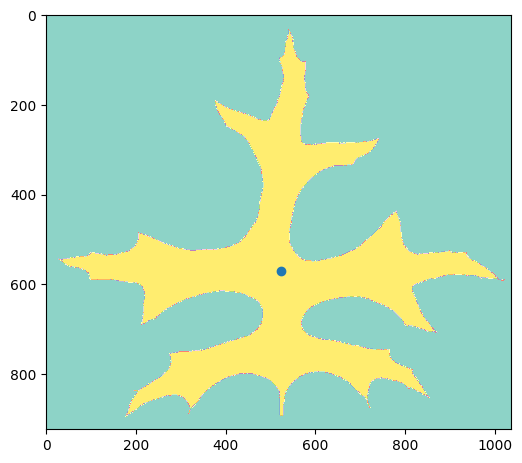

In [59]:
img = mpimg.imread('/kaggle/input/leaf-classification1/images/53.jpg')

cy, cx = ndi.center_of_mass(img)

plt.imshow(img, cmap='Set3')  
plt.scatter(cx, cy)          
plt.show()

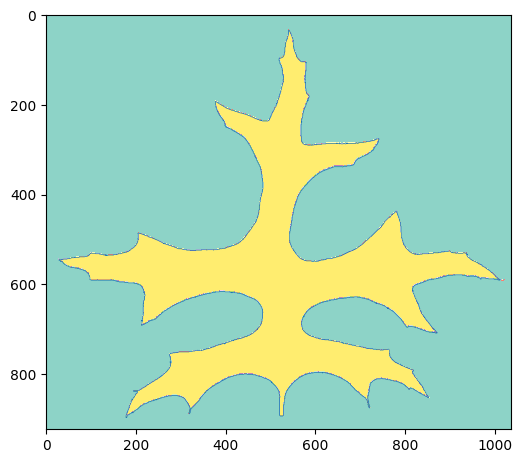

In [60]:
contours = measure.find_contours(img, .8)

contour = max(contours, key=len)

plt.plot(contour[::,1], contour[::,0], linewidth=0.5)  
plt.imshow(img, cmap='Set3')
plt.show()

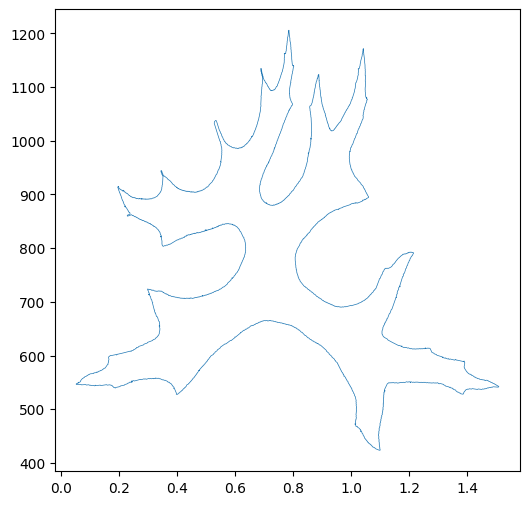

In [61]:
def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return [rho, phi]

polar_contour = np.array([cart2pol(x, y) for x, y in contour])

plt.plot(polar_contour[::,1], polar_contour[::,0], linewidth=0.5)
plt.show()

In [62]:
x = np.array([[[1,11,111], [2,22,222], [3,33,333]], 
              [[4,44,444], [5,55,555], [6,66,666]], 
              [[7,77,777], [8,88,888], [9,99,999]]])


x[::-1, 0, -1]

array([777, 444, 111])

In [63]:
contour[::,1] -= cx 
contour[::,0] -= cy 

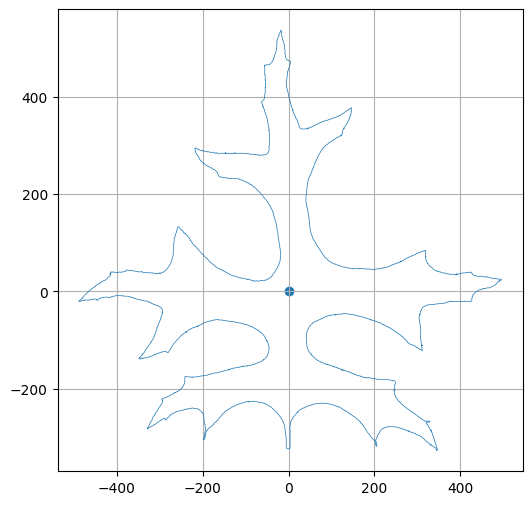

In [64]:
plt.plot(-contour[::,1], -contour[::,0], linewidth=0.5)
plt.grid()
plt.scatter(0, 0)
plt.show()

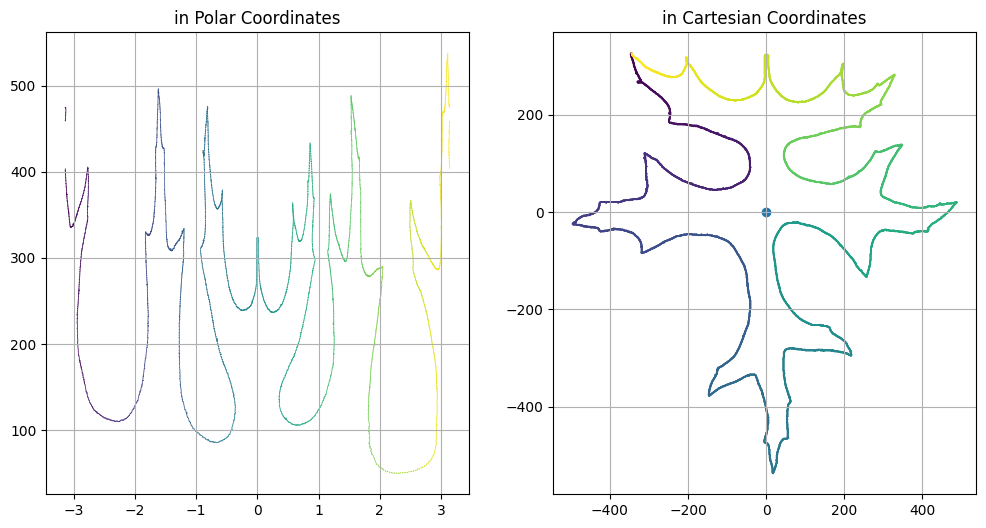

In [65]:
polar_contour = np.array([cart2pol(x, y) for x, y in contour])

rcParams['figure.figsize'] = (12, 6)
plt.subplot(121)
plt.scatter(polar_contour[::,1], polar_contour[::,0], linewidth=0, s=.5, c=polar_contour[::,1])
plt.title('in Polar Coordinates')
plt.grid()
plt.subplot(122)
plt.scatter(contour[::,1],             
            contour[::,0],             # y axis is distance from center
            linewidth=0, s=2,          # small points, w/o borders
            c=range(len(contour)))     # continuous coloring (so that plots match)
plt.scatter(0, 0)
plt.title('in Cartesian Coordinates')
plt.grid()
plt.show()

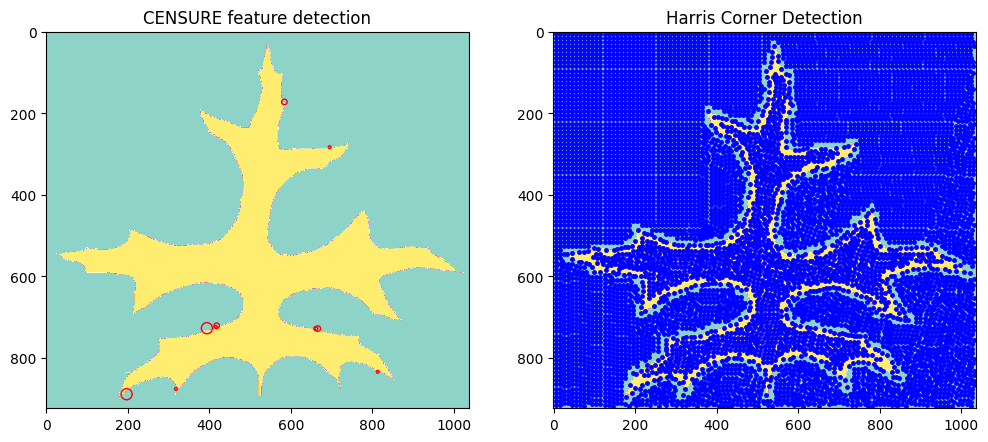

In [66]:
# check a few scikitlearn image feature extractions

from skimage.feature import corner_harris, corner_subpix, corner_peaks, CENSURE

detector = CENSURE()
detector.detect(img)

coords = corner_peaks(corner_harris(img), min_distance=5)
coords_subpix = corner_subpix(img, coords, window_size=13)

plt.subplot(121)
plt.title('CENSURE feature detection')
plt.imshow(img, cmap='Set3')
plt.scatter(detector.keypoints[:, 1], detector.keypoints[:, 0],
              2 ** detector.scales, facecolors='none', edgecolors='r')

plt.subplot(122)
plt.title('Harris Corner Detection')
plt.imshow(img, cmap='Set3')  
plt.plot(coords[:, 1], coords[:, 0], '.b', markersize=5)
plt.show()

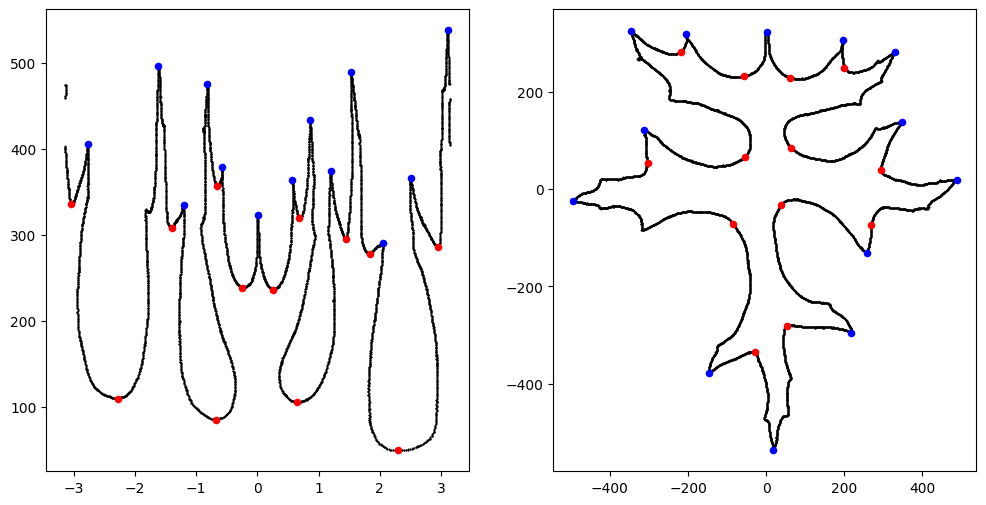

In [67]:
from scipy.signal import argrelextrema

# for local maxima
c_max_index = argrelextrema(polar_contour[::,0], np.greater, order=50)
c_min_index = argrelextrema(polar_contour[::,0], np.less, order=50)

plt.subplot(121)
plt.scatter(polar_contour[::,1], polar_contour[::,0], 
            linewidth=0, s=2, c='k')
plt.scatter(polar_contour[::,1][c_max_index], 
            polar_contour[::,0][c_max_index], 
            linewidth=0, s=30, c='b')
plt.scatter(polar_contour[::,1][c_min_index], 
            polar_contour[::,0][c_min_index], 
            linewidth=0, s=30, c='r')

plt.subplot(122)
plt.scatter(contour[::,1], contour[::,0], 
            linewidth=0, s=2, c='k')
plt.scatter(contour[::,1][c_max_index], 
            contour[::,0][c_max_index], 
            linewidth=0, s=30, c='b')
plt.scatter(contour[::,1][c_min_index], 
            contour[::,0][c_min_index], 
            linewidth=0, s=30, c='r')

plt.show()

<ipython-input-68-5f66787c8382>:13: DeprecationWarning: Please import `binary_erosion` from the `scipy.ndimage` namespace; the `scipy.ndimage.morphology` namespace is deprecated and will be removed in SciPy 2.0.0.
  erosion = cont(ndi.morphology.binary_erosion(img, structure=struct).astype(img.dtype))
<ipython-input-68-5f66787c8382>:14: DeprecationWarning: Please import `binary_closing` from the `scipy.ndimage` namespace; the `scipy.ndimage.morphology` namespace is deprecated and will be removed in SciPy 2.0.0.
  closing = cont(ndi.morphology.binary_closing(img, structure=struct).astype(img.dtype))
<ipython-input-68-5f66787c8382>:15: DeprecationWarning: Please import `binary_opening` from the `scipy.ndimage` namespace; the `scipy.ndimage.morphology` namespace is deprecated and will be removed in SciPy 2.0.0.
  opening = cont(ndi.morphology.binary_opening(img, structure=struct).astype(img.dtype))
<ipython-input-68-5f66787c8382>:16: DeprecationWarning: Please import `binary_dilation` fro

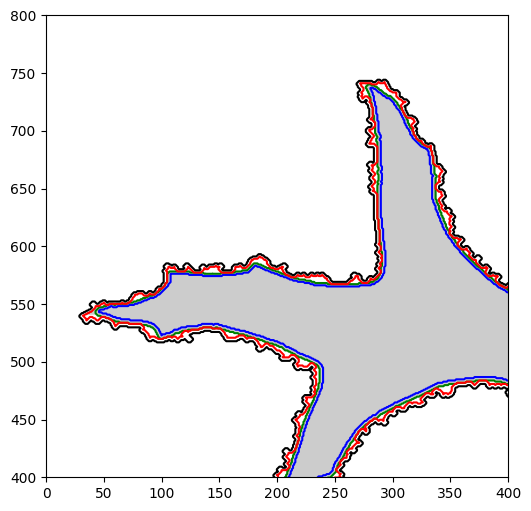

In [68]:
def cont(img):
    return max(measure.find_contours(img, .8), key=len)

# let us set the 'brush' to a 6x6 circle
struct = [[ 0., 0., 1., 1., 0., 0.],
          [ 0., 1., 1., 1., 1., 0.],  
          [ 1., 1., 1., 1., 1., 1.], 
          [ 1., 1., 1., 1., 1., 1.], 
          [ 1., 1., 1., 1., 1., 1.], 
          [ 0., 1., 1., 1., 1., 0.],
          [ 0., 0., 1., 1., 0., 0.]]

erosion = cont(ndi.morphology.binary_erosion(img, structure=struct).astype(img.dtype))
closing = cont(ndi.morphology.binary_closing(img, structure=struct).astype(img.dtype))
opening = cont(ndi.morphology.binary_opening(img, structure=struct).astype(img.dtype))
dilation = cont(ndi.morphology.binary_dilation(img, structure=struct).astype(img.dtype))

plt.imshow(img.T, cmap='Greys', alpha=.2)
plt.plot(erosion[::,0], erosion[::,1], c='b')
plt.plot(opening[::,0], opening[::,1], c='g')
plt.plot(closing[::,0], closing[::,1], c='r')
plt.plot(dilation[::,0], dilation[::,1], c='k')
#plt.xlim([220, 420])
#plt.ylim([250, 420])
plt.xlim([0, 400])
plt.ylim([400, 800])
plt.show()

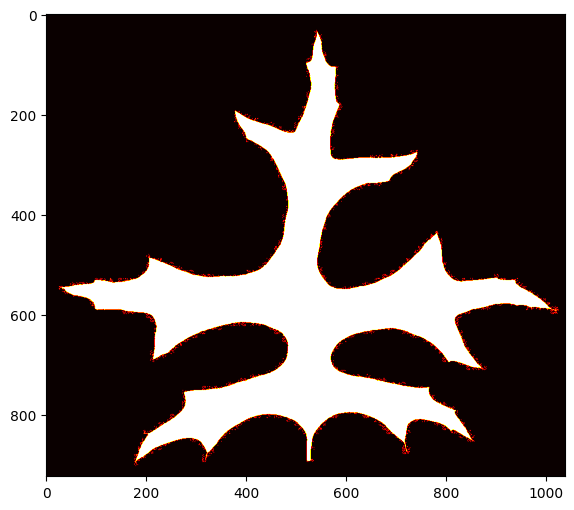

In [69]:
plt.imshow(img.astype(bool).astype(float), cmap='hot')
plt.show()

<ipython-input-70-7c6baac9f0e8>:1: DeprecationWarning: Please import `binary_erosion` from the `scipy.ndimage` namespace; the `scipy.ndimage.morphology` namespace is deprecated and will be removed in SciPy 2.0.0.
  erosion = cont(ndi.morphology.binary_erosion(img > 254, structure=struct).astype(img.dtype))
<ipython-input-70-7c6baac9f0e8>:2: DeprecationWarning: Please import `binary_closing` from the `scipy.ndimage` namespace; the `scipy.ndimage.morphology` namespace is deprecated and will be removed in SciPy 2.0.0.
  closing = cont(ndi.morphology.binary_closing(img > 254, structure=struct).astype(img.dtype))
<ipython-input-70-7c6baac9f0e8>:3: DeprecationWarning: Please import `binary_opening` from the `scipy.ndimage` namespace; the `scipy.ndimage.morphology` namespace is deprecated and will be removed in SciPy 2.0.0.
  opening = cont(ndi.morphology.binary_opening(img > 254, structure=struct).astype(img.dtype))
<ipython-input-70-7c6baac9f0e8>:4: DeprecationWarning: Please import `binary

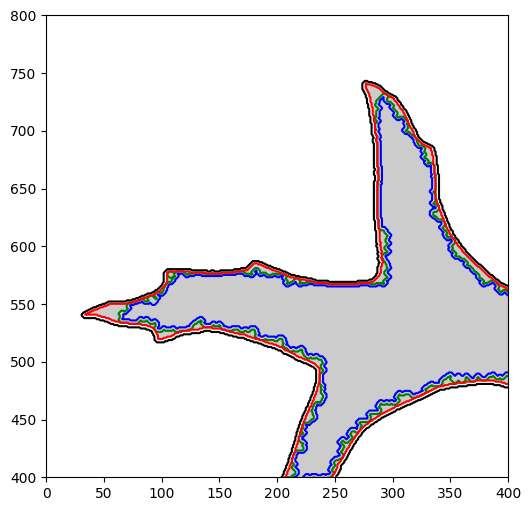

In [70]:
erosion = cont(ndi.morphology.binary_erosion(img > 254, structure=struct).astype(img.dtype))
closing = cont(ndi.morphology.binary_closing(img > 254, structure=struct).astype(img.dtype))
opening = cont(ndi.morphology.binary_opening(img > 254, structure=struct).astype(img.dtype))
dilation = cont(ndi.morphology.binary_dilation(img > 254, structure=struct).astype(img.dtype))

plt.imshow(img.T, cmap='Greys', alpha=.2)
plt.plot(erosion[::,0], erosion[::,1], c='b')
plt.plot(opening[::,0], opening[::,1], c='g')
plt.plot(closing[::,0], closing[::,1], c='r')
plt.plot(dilation[::,0], dilation[::,1], c='k')
plt.xlim([0, 400])
plt.ylim([400, 800])
plt.show()

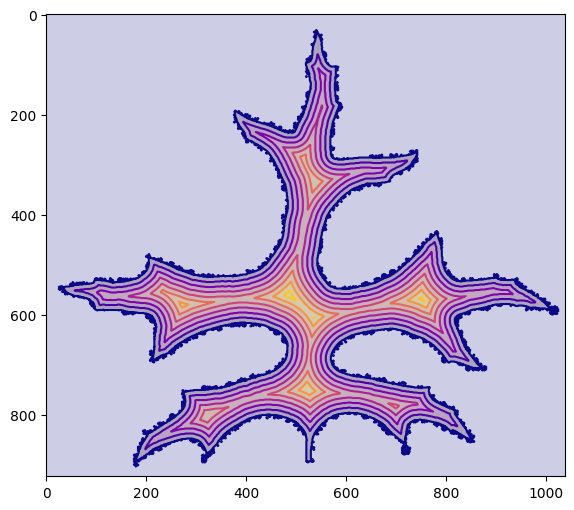

In [71]:
dist_2d = ndi.distance_transform_edt(img)
plt.imshow(img, cmap='Greys', alpha=.2)
plt.imshow(dist_2d, cmap='plasma', alpha=.2)
plt.contour(dist_2d, cmap='plasma')
plt.show()